# <center>Predicting Car accident severity</center>

<center><font size = 5> Atheer Alkraida</font></center>

<center><font size = 5> September 5, 2020</font></center>

## Introduction: Business Problem

### 1.1 Background

In this project we will try to predict the severity of traffic accidents. This report targets individuals who want to avoid getting involved into the problems that car accidents cause, like delay, change of plans, or even property/car damage.
Having an understanding of what causes car accidents is the secret to avoid being involved in one. In other words, knowing how bad an accident can be based on certain identifiers can help individuals avoid suffering the consequences of being involved in them, by driving more carefully if came across these types of identifiers or even change their plans. Therefore, it became important to predict the severity of accidents based on their characteristics like if this accident will cause death fatalities or traffic delay, or any other bad impact of accidents.

## Data

Based on the description of our problem, the factors that might influence the prediction are:
<ls> 
<li>Weather          </li>
<li>Address Type       </li>
<li>Collision Type    </li>
<li>Under the influence of drugs        </li>
<li>Road Condition </li>
<li>Light Condition</li>
<li>Accident Date/time     </li>
<li>Number of persons in an accident      </li>
<li>Number of vichels in an accident         </li>
    </ls>
We will also extract the weekday from the accident date/time to see the number of accident across the different days.

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [37]:
SeattleCity_DF = pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [38]:
SeattleCity_DF.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [39]:
SeattleCity_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
OBJECTID          194673 non-null int64
INCKEY            194673 non-null int64
COLDETKEY         194673 non-null int64
REPORTNO          194673 non-null object
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
EXCEPTRSNDESC     5638 non-null object
SEVERITYCODE.1    194673 non-null int64
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null object
INCDTTM           194673 non-null obje

## Methodology

First, we will clean up the data and remove any inconsistencies within the data. Next we will ensure that the data are in the appropriate format for analysis. 

We will analyze the effect of each of the features that we have mentioned previously and see how the number of injury collisions and property damage collisions appear.

The dataset has 38 columns and 194,673 records. There are some problems with the current set and the first one is that date and time columns are not in their correct types. We will change the type as below,

In [40]:
SeattleCity_DF['INCDATE'] = pd.to_datetime(SeattleCity_DF['INCDATE'])
SeattleCity_DF['INCDTTM'] = pd.to_datetime(SeattleCity_DF['INCDTTM'])

Next, there is an inconsistency in the values of the UNDERINFL column, this column tells whether or not a driver involved was under the influence of drugs or alcohol. The actual values have is either Yes or No, but we have 0 and 1 as well. Practically 0 represents No and 1 represent Yes, so I unified the representation for the data to the character representation.

In [41]:
SeattleCity_DF['UNDERINFL'] = SeattleCity_DF['UNDERINFL'].replace('0','N')
SeattleCity_DF['UNDERINFL'] = SeattleCity_DF['UNDERINFL'].replace('1','Y')

Third is the percentage of Null values within the dataset. Out of the current 38 columns, there are 18 features that contain Null values with percentages that vary from 0.009% to 97%. The column with the highest Null values is describing whether or not the pedestrian right of way is not granted. The other value in this column is Yes, but since the percentage of the unknown is way higher than the percentage of known values and there is only one value in the non-empty cells for this column, I can't set or predict the value for the missing data. Moreover, the speeding column and the Inattention column are having the same problem as the previous column, speeding has only 4.8% non-empty values and they are all Yes and Inattention has only 15% not-null values with the value Yes. I found that dropping these columns will be the best option to go with in this situation. Moreover, INTKEY, EXCEPTRSNCODE, EXCEPTRSNDESC, SDOTCOLNUM, ST_COLCODE, and ST_COLDESC are columns with Null values, they can't be filled because they refer to identification codes, so I will drop these columns too. For the remaining columns with Null values, I have decided to drop their Null values to not influence the final result. 

In [42]:
SeattleCity_DF = SeattleCity_DF.drop(['INATTENTIONIND','SPEEDING','PEDROWNOTGRNT','INTKEY','EXCEPTRSNCODE','EXCEPTRSNDESC','SDOTCOLNUM','ST_COLCODE','ST_COLDESC'],axis = 1)

In [43]:
SeattleCity_DF.dropna(inplace = True)

In [44]:
CarAccidentsBySPD_DF = SeattleCity_DF.drop(['X','Y','PEDCYLCOUNT','JUNCTIONTYPE','HITPARKEDCAR','LOCATION','SEVERITYCODE.1','CROSSWALKKEY','SEVERITYDESC','INCDATE','OBJECTID','COLDETKEY','INCKEY','SEGLANEKEY','REPORTNO','STATUS','SDOT_COLCODE','SDOT_COLDESC'],axis = 1)

The fourth issue is that there is some inconsistency that I found in the relationship between the Accident time and the light condition, there are some records that show that the light is Daylight but the accident happened before 5 am, which is not reasonable. Basically, is Seattle city, daylight minimally starts from 5:30 am till 9:00 pm maximum. Dawn can start at 4:30 am till 5:30 am while dusk can start at 9:00 pm and ends at 10:00 pm. The night can be from 10:00 pm to 5:30 am. So I extracted the hour from the accident time and only selected the records that are matching the above statements and excluded the Unknown from the dataset. 

In [46]:
CarAccidentsBySPD_DF['Accident_Hour'] = CarAccidentsBySPD_DF['INCDTTM'].dt.hour

As we can see below the distribution of the accidents is not making sense,

(array([-5.,  0.,  5., 10., 15., 20., 25.]),
 <a list of 7 Text xticklabel objects>)

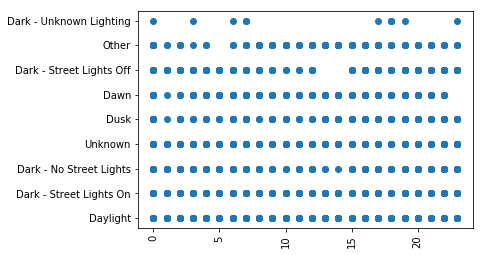

In [47]:
plt.scatter(x=CarAccidentsBySPD_DF.Accident_Hour,y=CarAccidentsBySPD_DF.LIGHTCOND)
plt.xticks(rotation = 90)

In [53]:
# Extracting the right patterns for light condition and accident hour 
df0 = CarAccidentsBySPD_DF.query("LIGHTCOND == 'Dawn' & Accident_Hour >=4 & Accident_Hour < 5")
df1 = CarAccidentsBySPD_DF.query("LIGHTCOND =='Daylight' & Accident_Hour >=5 & Accident_Hour < 21")
df3 = CarAccidentsBySPD_DF.query("LIGHTCOND =='Dusk' & Accident_Hour >=21 & Accident_Hour < 22")
df4 = CarAccidentsBySPD_DF.query("LIGHTCOND == 'Dark - Street Lights On' & Accident_Hour >=22 & Accident_Hour < 4")
df5 = CarAccidentsBySPD_DF.query("LIGHTCOND == 'Dark - No Street Lights' & Accident_Hour >=22 & Accident_Hour < 4")
df6 = CarAccidentsBySPD_DF.query("LIGHTCOND == 'Dark - Street Lights Off' & Accident_Hour >=22 & Accident_Hour < 4")
df7 = CarAccidentsBySPD_DF.query("LIGHTCOND == 'Other'")
df_all = pd.concat([df0, df1, df3, df4, df5, df6, df7])
CarAccidentsBySPD_DF = df_all

After fixing the data it will appear as the below,

([0, 1, 2, 3], <a list of 4 Text xticklabel objects>)

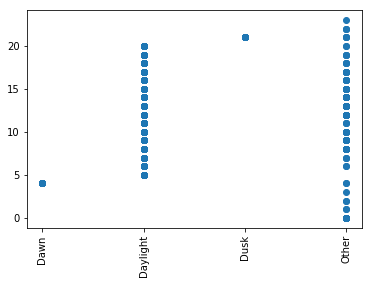

In [55]:
plt.scatter(x=CarAccidentsBySPD_DF.LIGHTCOND,y=CarAccidentsBySPD_DF.Accident_Hour)
plt.xticks(rotation = 90)

Furthermore, the WEATHER and ROADCOND are also showing some inconsistencies. When the weather is raining, we expect the road to be wet and not dry. Dry roads can exist when the weather is clear, overcast, fog/smog/smoke, severe crosswind, and partly cloudy. As for wet and standing water roads, it mostly happens when the weather is raining. Roads with snow/slush can only be seen if it is snowing. As for icy roads, it appears when there is sleet/hail/freezing rain. For roads with sand/mud/dirt, they can exist when the weather is either raining or blowing sand/dirt. Finally, oily roads can appear in case the weather is clear or overcast. I fixed these data inconsistencies and now my dataset is ready for analysis.

([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text xticklabel objects>)

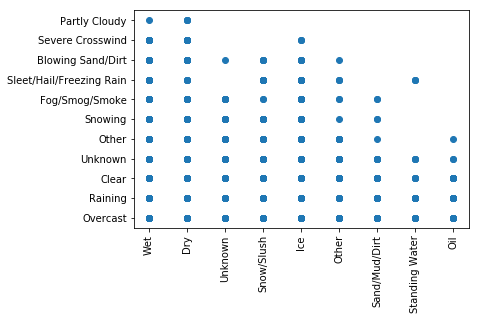

In [49]:
plt.scatter(x=CarAccidentsBySPD_DF.ROADCOND,y=CarAccidentsBySPD_DF.WEATHER)
plt.xticks(rotation = 90)

In [50]:
# Extracting the right patterns for road condition and weather 
df8 = CarAccidentsBySPD_DF.query("ROADCOND == 'Dry' & (WEATHER=='Clear' | WEATHER=='Partly Cloudy'| WEATHER=='Severe Crosswind'| WEATHER=='Fog/Smog/Smoke'| WEATHER=='Overcast')")
df9 = CarAccidentsBySPD_DF.query("(ROADCOND == 'Wet'|ROADCOND =='Standing Water') & WEATHER =='Raining'")
df10 = CarAccidentsBySPD_DF.query("ROADCOND =='Snow/Slush' & WEATHER == 'Snowing'")
df11 = CarAccidentsBySPD_DF.query("ROADCOND == 'Ice' & WEATHER == 'Sleet/Hail/Freezing Rain'")
df12 = CarAccidentsBySPD_DF.query("ROADCOND == 'Sand/Mud/Dirt' & (WEATHER == 'Blowing Sand/Dirt'|WEATHER == 'Raining')")
df13 = CarAccidentsBySPD_DF.query("ROADCOND == 'Oil' & (WEATHER == 'Clear' | WEATHER == 'Overcast')")
df14 = CarAccidentsBySPD_DF.query("ROADCOND == 'Other' & WEATHER == 'Other'")
df_all_2 = pd.concat([df8, df9, df10, df11, df12, df13, df14])
CarAccidentsBySPD_DF = df_all_2

After fixing the dataset, the roads and weather should show a consistent data,

([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text xticklabel objects>)

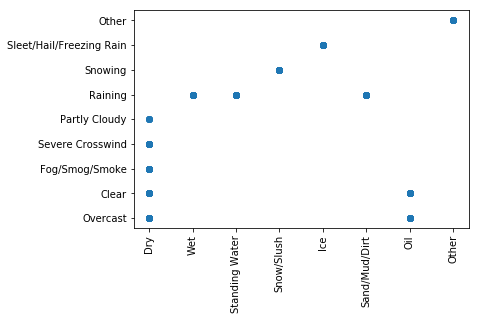

In [51]:
plt.scatter(x=CarAccidentsBySPD_DF.ROADCOND,y=CarAccidentsBySPD_DF.WEATHER)
plt.xticks(rotation = 90)

## Data Analysis

Initially, we will perform the simple data analysis using the describe function,

In [56]:
CarAccidentsBySPD_DF.describe()

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,VEHCOUNT,Accident_Hour
count,87263.000000,87263.000000,87263.000000,87263.000000,87263.000000
mean,1.344694,2.513001,0.039627,1.986661,12.957267
std,0.475271,1.458874,0.203929,0.535384,3.433241
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,0.000000,2.000000,10.000000
50%,1.000000,2.000000,0.000000,2.000000,13.000000
75%,2.000000,3.000000,0.000000,2.000000,16.000000
max,2.000000,57.000000,4.000000,10.000000,23.000000


We will take a look at the visual relation between the Severity code and the features that we have selected for our analysis. First is the Weather and the accident severity.

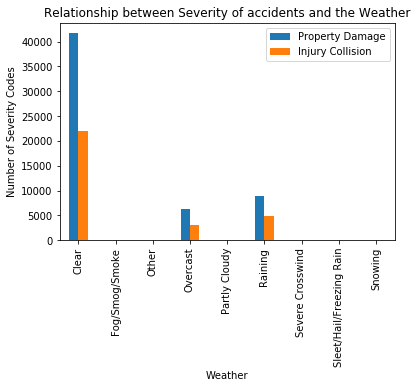

In [21]:
CarAccidentsBySPD_DF.groupby(['WEATHER','SEVERITYCODE']).size().unstack().plot(kind='bar',stacked=False)
plt.title('Relationship between Severity of accidents and the Weather')
plt.xlabel('Weather')
plt.ylabel('Number of Severity Codes')
plt.legend(['Property Damage','Injury Collision'])
plt.show()

It appears that the higher number of accidents happens in clear weather compared to bad and risky weather. 

In our next graph we checked how address type can be effective in determining the severity of accidents. 

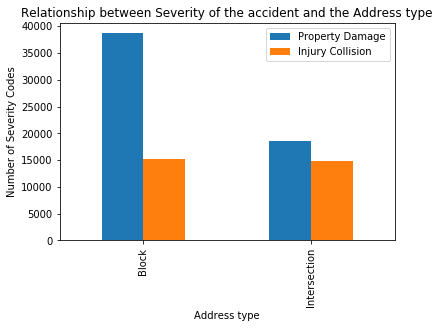

In [114]:
CarAccidentsBySPD_DF.groupby(['ADDRTYPE','SEVERITYCODE']).size().unstack().plot(kind='bar',stacked=False)
plt.xlabel('Address type')
plt.title('Relationship between Severity of the accident and the Address type')
plt.ylabel('Number of Severity Codes')
plt.legend(['Property Damage','Injury Collision'])
plt.show()

Next, we see that injuries happen more often when the collision is at the rear end of the car and at the car angles. But most property damage collisions happen to parked cars.

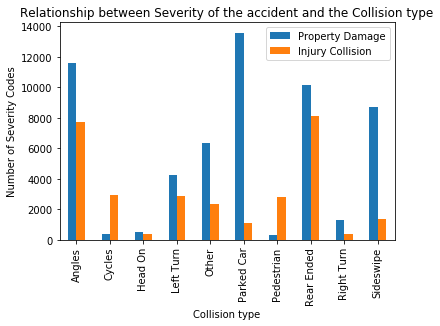

In [113]:
CarAccidentsBySPD_DF.groupby(['COLLISIONTYPE','SEVERITYCODE']).size().unstack().plot(kind='bar',stacked=False)
plt.xlabel('Collision type')
plt.title('Relationship between Severity of the accident and the Collision type')
plt.ylabel('Number of Severity Codes')
plt.legend(['Property Damage','Injury Collision'])
plt.show()

Surprisingly most accidents were done by people who are not under any drug or effection. This leads to the assumption that people's miss behavior might be the main cause for traffic accidents.

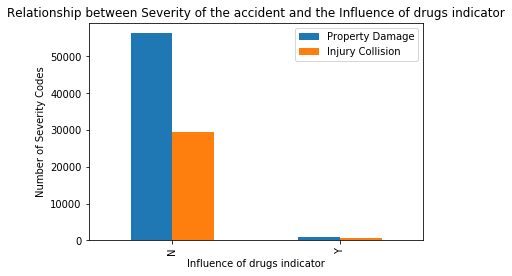

In [115]:
CarAccidentsBySPD_DF.groupby(['UNDERINFL','SEVERITYCODE']).size().unstack().plot(kind='bar',stacked=False)
plt.xlabel('Influence of drugs indicator')
plt.title('Relationship between Severity of the accident and the Influence of drugs indicator')
plt.ylabel('Number of Severity Codes')
plt.legend(['Property Damage','Injury Collision'])
plt.show()

It appears that road condition doesn't have an effection on the accident severity. The higher number of accidents is happening on the dry roads and there is only low number of accidents that happened on wet roads. Other conditions for roads are barely showing any accidents.

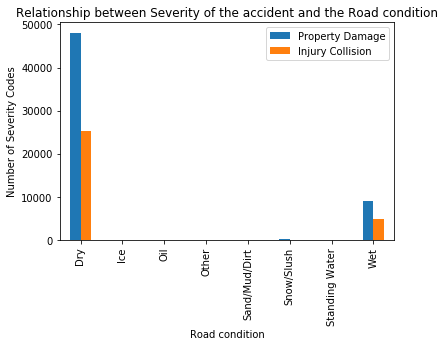

In [116]:
CarAccidentsBySPD_DF.groupby(['ROADCOND','SEVERITYCODE']).size().unstack().plot(kind='bar',stacked=False)
plt.xlabel('Road condition')
plt.title('Relationship between Severity of the accident and the Road condition')
plt.ylabel('Number of Severity Codes')
plt.legend(['Property Damage','Injury Collision'])
plt.show()

Just like the previous feature, light is not influencing the number of accidents. Having the highest number of accidents in the daylight means that accidents didn't happen because of the lack of lights on the road. 

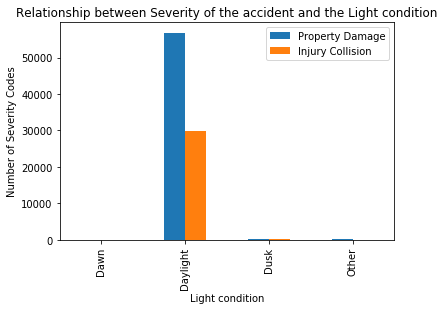

In [117]:
CarAccidentsBySPD_DF.groupby(['LIGHTCOND','SEVERITYCODE']).size().unstack().plot(kind='bar',stacked=False)
plt.xlabel('Light condition')
plt.title('Relationship between Severity of the accident and the Light condition')
plt.ylabel('Number of Severity Codes')
plt.legend(['Property Damage','Injury Collision'])
plt.show()

Here we have used the weekday feature which we extracted from the accident date feature. The graph shows that accidents happen in a similar frequency, but the day that shows higher number of accidents is the last day of working days.

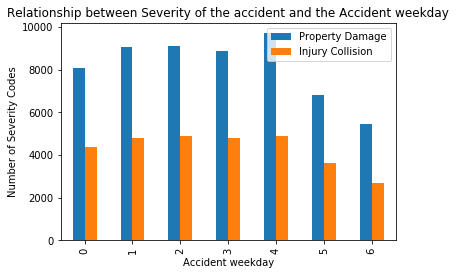

In [118]:
CarAccidentsBySPD_DF['dayofweek'] = CarAccidentsBySPD_DF['INCDTTM'].dt.dayofweek
CarAccidentsBySPD_DF.groupby(['dayofweek','SEVERITYCODE']).size().unstack().plot(kind='bar',stacked=False)
plt.xlabel('Accident weekday')
plt.title('Relationship between Severity of the accident and the Accident weekday')
plt.ylabel('Number of Severity Codes')
plt.legend(['Property Damage','Injury Collision'])
plt.show()

Below we will present the relationship between how bad the car accident is and how many people were involved in these accidents.

(0, 6)

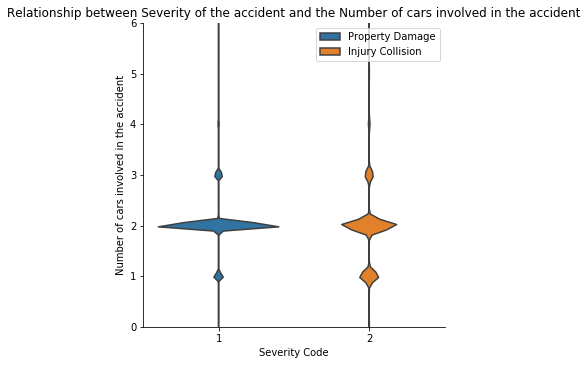

In [119]:
sns.catplot(x="SEVERITYCODE", y="VEHCOUNT",kind="violin", inner=None, data=CarAccidentsBySPD_DF)
plt.xlabel('Severity Code')
plt.title('Relationship between Severity of the accident and the Number of cars involved in the accident')
plt.ylabel('Number of cars involved in the accident')
plt.legend(['Property Damage','Injury Collision'])
plt.ylim(0,6)

Most simple accidents that only cause property damage involves one to three people, but the accidents that cause injuries tend to have a higher number of involved people. 

(0, 10)

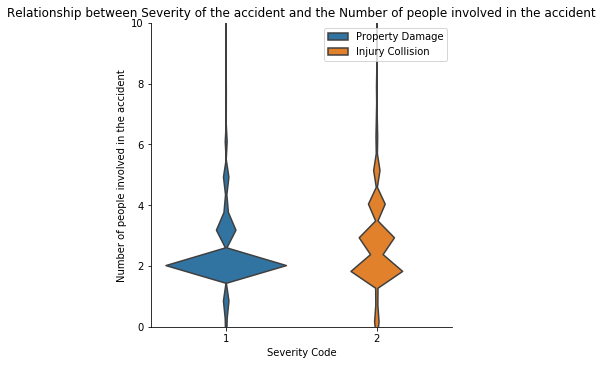

In [120]:
sns.catplot(x="SEVERITYCODE", y="PERSONCOUNT",kind="violin", inner=None, data=CarAccidentsBySPD_DF)
plt.xlabel('Severity Code')
plt.title('Relationship between Severity of the accident and the Number of people involved in the accident')
plt.ylabel('Number of people involved in the accident')
plt.legend(['Property Damage','Injury Collision'])
plt.ylim(0,10)

## Conclusion

In this project, we analyzed the relationship between the severity of car accidents and traffic accident characteristics. We have identified address type, collision type, weather, and people count to be the most influencing features of the accident severity. After preparing the data in the proper format and removing dummy data that is not consistent with other features, we were able to plot the different features agains the main factor of interest and see how they influence it.